### Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

### Importing dataset from xlsx file

In [2]:
data = pd.read_excel("C://Users/Pable/Downloads/Midsem & Assignment Marks MM-406_2019-2_Students corrected.xlsx")

In [3]:
data


,Serial No.,Roll No.,Name,out of 100,out of 50,Unnamed: 5,out of 40,out of 60,Total (100),Unnamed: 9,Unnamed: 10
0,34.0,160110060,AAYUSH ANURAG,90,45,NaN,36,54,90.0,NaN,90.00
1,14.0,160110024,RAUT PRAVIN PANDURANG,88,44,NaN,35.2,52.8,88.0,NaN,88.00
2,4.0,160110003,MEHTA SIDDHARTH HEMAL,98,40,NaN,39.2,48,87.2,NaN,84.50
3,46.0,160110086,CHINMAY KALRA,94,39,NaN,37.6,46.8,84.4,NaN,82.00
4,55.0,16D110010,ITALE ANUP HANAMANT,93,37,NaN,37.2,44.4,81.6,NaN,78.75
5,7.0,160110011,ABHINAV DHAKRAS,95,36,NaN,38,43.2,81.2,NaN,77.75
6,8.0,160110012,BAL PUSHAN PRASANNA,94,35.5,NaN,37.6,42.6,80.2,NaN,76.75
7,47.0,160110087,PAGE SRIDHAR BABU,94,35,NaN,37.6,42,79.6,NaN,76.00
8,3.0,16D110002,PABLE PRANAV ANAND,100,31,NaN,40,37.2,77.2,NaN,71.50
9,20.0,160110037,DIVYANSHU CHAHAL,96,31,NaN,38.4,37.2,75.6,NaN,70.50


In [4]:
data = data.iloc[:,2:5]
data = data.iloc[0:56,]

In [5]:
data.head(5)

,Name,out of 100,out of 50
0,AAYUSH ANURAG,90,45
1,RAUT PRAVIN PANDURANG,88,44
2,MEHTA SIDDHARTH HEMAL,98,40
3,CHINMAY KALRA,94,39
4,ITALE ANUP HANAMANT,93,37


In [6]:
data['out of 100'] =pd.to_numeric(data['out of 100'])
data['out of 50'] =pd.to_numeric(data['out of 50'])

### Adding totals according to two methods => Patel's : 25/75 ; saveAss : 40/60

In [7]:
Patel = []
saveAss = []
for i in range(len(data.Name)):
    Patel.append(25*data['out of 100'][i]/100 + 75*data['out of 50'][i]/50)
    saveAss.append(40*data['out of 100'][i]/100+ 60*data['out of 50'][i]/50)   
data['Patel'] = Patel
data['saveAss'] = saveAss

In [8]:
data.head()

,Name,out of 100,out of 50,Patel,saveAss
0,AAYUSH ANURAG,90,45.0,90.00,90.0
1,RAUT PRAVIN PANDURANG,88,44.0,88.00,88.0
2,MEHTA SIDDHARTH HEMAL,98,40.0,84.50,87.2
3,CHINMAY KALRA,94,39.0,82.00,84.4
4,ITALE ANUP HANAMANT,93,37.0,78.75,81.6


### Lower strata

In [9]:
@interact
def show_people_less_than(column = ['Patel'],Passing = (0,40,2)):
    return data.loc[data[column]<Passing]

interactive(children=(Dropdown(description='column', options=('Patel',), value='Patel'), IntSlider(value=20, description='Passing', max=40, step=2), Output()), _dom_classes=('widget-interact',))

In [10]:
@interact
def show_people_less_than(column = ['saveAss'],Passing = (0,40,2)):
    return data.loc[data[column]<Passing]

interactive(children=(Dropdown(description='column', options=('saveAss',), value='saveAss'), IntSlider(value=20, description='Passing', max=40, step=2), Output()), _dom_classes=('widget-interact',))

### Last year's grading statistic

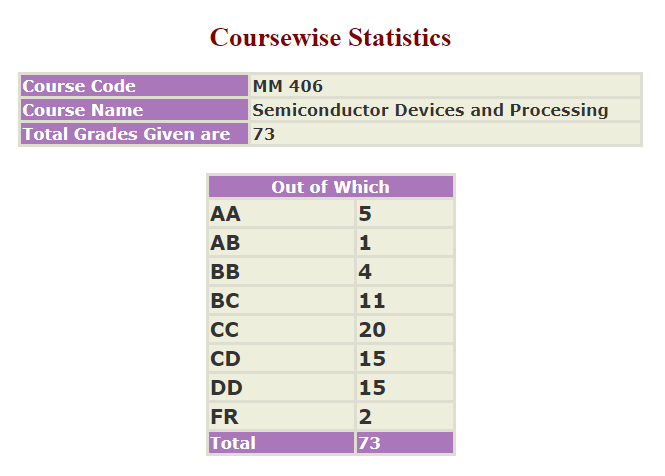

### Ranking people according to totals

In [11]:
data['Patel_Rank'] = data['Patel'].rank(ascending=False)
data['saveAss_Rank'] = data['saveAss'].rank(ascending=False)

In [12]:
data.head()

,Name,out of 100,out of 50,Patel,saveAss,Patel_Rank,saveAss_Rank
0,AAYUSH ANURAG,90,45.0,90.00,90.0,1.0,1.0
1,RAUT PRAVIN PANDURANG,88,44.0,88.00,88.0,2.0,2.0
2,MEHTA SIDDHARTH HEMAL,98,40.0,84.50,87.2,3.0,3.0
3,CHINMAY KALRA,94,39.0,82.00,84.4,4.0,4.0
4,ITALE ANUP HANAMANT,93,37.0,78.75,81.6,5.0,5.0


### Assigning grades assuming the distribution of grades remains continued

In [13]:
Patel_projected_grade = []
saveAss_projected_grade = []
grade_dist = [4,1,3,8,15,11,12,2]
for i in range(data.shape[0]):
    if data.Patel_Rank[i] <= 4 :
        Patel_projected_grade.append(10)
    if data.saveAss_Rank[i] <= 4 :
        saveAss_projected_grade.append(10)
    if data.Patel_Rank[i] == 5  :
        Patel_projected_grade.append(9)
    if data.saveAss_Rank[i] == 5 :
        saveAss_projected_grade.append(9)
    if data.Patel_Rank[i] <= 8 and data.Patel_Rank[i] >5:
        Patel_projected_grade.append(8)
    if data.saveAss_Rank[i] <= 8 and data.saveAss_Rank[i] > 5:
        saveAss_projected_grade.append(8)
    if data.Patel_Rank[i] <= 16 and data.Patel_Rank[i] >8:
        Patel_projected_grade.append(7)
    if data.saveAss_Rank[i] <= 16 and data.saveAss_Rank[i] > 8:
        saveAss_projected_grade.append(7)
    if data.Patel_Rank[i] <= 31 and data.Patel_Rank[i] >16 :
        Patel_projected_grade.append(6)
    if data.saveAss_Rank[i] <= 31 and data.saveAss_Rank[i] > 16:
        saveAss_projected_grade.append(6)
    if data.Patel_Rank[i] <= 42 and data.Patel_Rank[i] >31 :
        Patel_projected_grade.append(5)
    if data.saveAss_Rank[i] <= 42 and data.saveAss_Rank[i] >31:
        saveAss_projected_grade.append(5)
    if data.Patel_Rank[i] <= 54 and data.Patel_Rank[i] >42 :
        Patel_projected_grade.append(4)
    if data.saveAss_Rank[i] <= 54 and data.saveAss_Rank[i] > 42:
        saveAss_projected_grade.append(4)
    if data.Patel_Rank[i] <= 56 and data.Patel_Rank[i] >54 :
        Patel_projected_grade.append(-1)
    if data.saveAss_Rank[i] <= 56 and data.saveAss_Rank[i] > 54:
        saveAss_projected_grade.append(-1)
data['Patel_projected_grade'] = Patel_projected_grade
data['saveAss_projected_grade'] = saveAss_projected_grade

In [14]:
data.head()

,Name,out of 100,out of 50,Patel,saveAss,Patel_Rank,saveAss_Rank,Patel_projected_grade,saveAss_projected_grade
0,AAYUSH ANURAG,90,45.0,90.00,90.0,1.0,1.0,10,10
1,RAUT PRAVIN PANDURANG,88,44.0,88.00,88.0,2.0,2.0,10,10
2,MEHTA SIDDHARTH HEMAL,98,40.0,84.50,87.2,3.0,3.0,10,10
3,CHINMAY KALRA,94,39.0,82.00,84.4,4.0,4.0,10,10
4,ITALE ANUP HANAMANT,93,37.0,78.75,81.6,5.0,5.0,9,9


### Who benefits and who doesn't?

In [15]:
benefit_by_saveAss = []
loss = []
difference = []
o_g = []
n_g = []
print("Following people are at loss with 60/40")
for i in range(data.shape[0]):
    diff = data.saveAss_projected_grade[i]- data.Patel_projected_grade[i]
    benefit_by_saveAss.append(diff)
    if diff < 0:
        loss.append(data.Name[i])
        difference.append(diff)
        o_g.append(data.Patel_projected_grade[i])
        n_g.append(data.saveAss_projected_grade[i])
data['Benefit'] = benefit_by_saveAss
for i in range(len(loss)):
    print(loss[i]," => Grade shifted from", o_g[i]," to ",n_g[i])
if len(loss)==0:
    print("Nobody stands to loose with new 60/40 system")

Following people are at loss with 60/40
PATEL HARSHKUMAR  => Grade shifted from 7  to  6
PRANAY RAJ  => Grade shifted from 7  to  6
RAO ADWITIYA VISHWESHWAR  => Grade shifted from 6  to  5
PAGE SRINIVAS  => Grade shifted from 6  to  5
TAPESH KUMAR  => Grade shifted from 5  to  4
ROBINCE KUMAR  => Grade shifted from 4  to  -1


### Final Dataset

In [16]:
data

,Name,out of 100,out of 50,Patel,saveAss,Patel_Rank,saveAss_Rank,Patel_projected_grade,saveAss_projected_grade,Benefit
0,AAYUSH ANURAG,90,45.0,90.00,90.0,1.0,1.0,10,10,0
1,RAUT PRAVIN PANDURANG,88,44.0,88.00,88.0,2.0,2.0,10,10,0
2,MEHTA SIDDHARTH HEMAL,98,40.0,84.50,87.2,3.0,3.0,10,10,0
3,CHINMAY KALRA,94,39.0,82.00,84.4,4.0,4.0,10,10,0
4,ITALE ANUP HANAMANT,93,37.0,78.75,81.6,5.0,5.0,9,9,0
5,ABHINAV DHAKRAS,95,36.0,77.75,81.2,6.0,6.0,8,8,0
6,BAL PUSHAN PRASANNA,94,35.5,76.75,80.2,7.0,7.0,8,8,0
7,PAGE SRIDHAR BABU,94,35.0,76.00,79.6,8.5,8.0,7,8,1
8,PABLE PRANAV ANAND,100,31.0,71.50,77.2,11.0,9.0,7,7,0
9,DIVYANSHU CHAHAL,96,31.0,70.50,75.6,13.0,10.0,7,7,0
